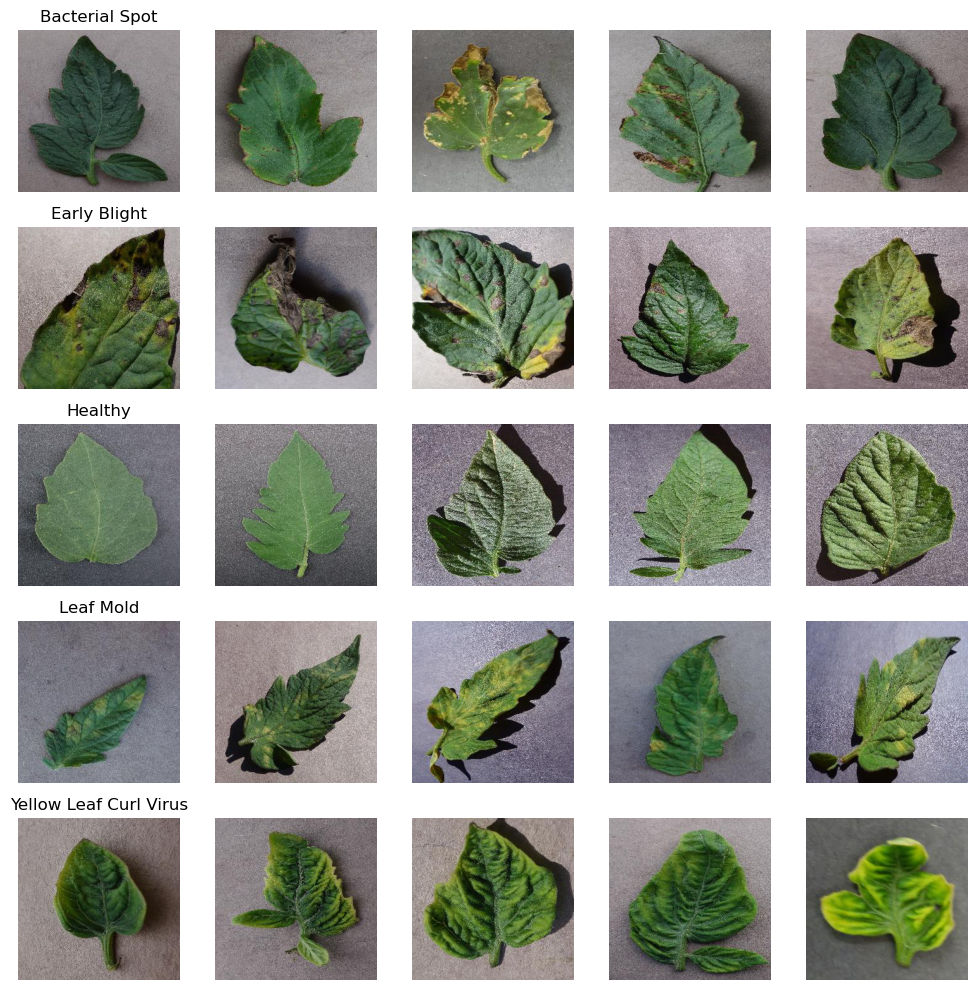

In [34]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the directory where the dataset is located
dataset_dir = r"C:\Users\ACER\Pca_model\Dataset\New folder"

# Function to display images from each class
def show_images_per_class(dataset_dir, num_images=5):
    # List all class folders
    class_names = os.listdir(dataset_dir)
    
    # Create a figure for displaying images
    fig = plt.figure(figsize=(10, 10))
    
    # Loop through each class folder
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            # Get the list of images in the class folder
            image_files = os.listdir(class_dir)
            
            # Display the first few images from the class folder
            for j in range(num_images):
                if j < len(image_files):
                    image_path = os.path.join(class_dir, image_files[j])
                    image = mpimg.imread(image_path)
                    ax = fig.add_subplot(len(class_names), num_images, i * num_images + j + 1)
                    ax.imshow(image)
                    ax.axis('off')
                    if j == 0:
                        ax.set_title(class_name, fontsize=12)
    plt.tight_layout()
    plt.show()

# Show images per class
show_images_per_class(dataset_dir)


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from PIL import Image
import base64
from io import BytesIO


In [3]:
def image_base64(image_path):
    img = Image.open(image_path)
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    return base64.b64encode(buffer.getvalue()).decode()


In [4]:
def create_image_dataframe(dataset_dir, num_images=3):
    data = []
    class_names = os.listdir(dataset_dir)
    
    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            image_files = os.listdir(class_dir)[:num_images]
            for image_file in image_files:
                image_path = os.path.join(class_dir, image_file)
                img_tag = f'<img src="data:image/jpeg;base64,{image_base64(image_path)}" width="100" height="100">'
                data.append([class_name, img_tag])
    
    df = pd.DataFrame(data, columns=['Class', 'Image'])
    return df


In [16]:
def plot_image_distribution(dataset_dir):
    class_names = os.listdir(dataset_dir)
    class_counts = []
    
    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            class_counts.append((class_name, len(os.listdir(class_dir))))
    
    class_counts.sort(key=lambda x: x[1], reverse=True)
    
    classes, counts = zip(*class_counts)
    plt.figure(figsize=(10, 8))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class Names', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title('Distribution of Images per Class', fontsize=16)
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()


,Class,Image
0,Bacterial Spot,
1,Bacterial Spot,
2,Bacterial Spot,
3,Early Blight,
4,Early Blight,
5,Early Blight,
6,Healthy,
7,Healthy,
8,Healthy,
9,Leaf Mold,

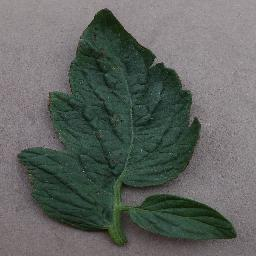
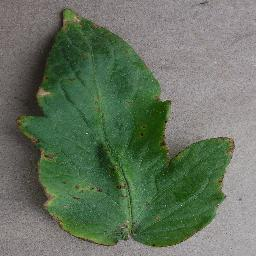
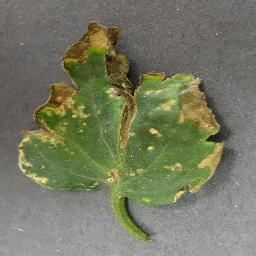
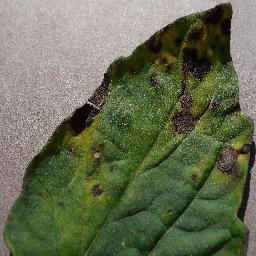
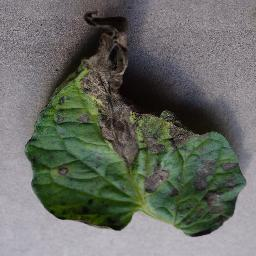
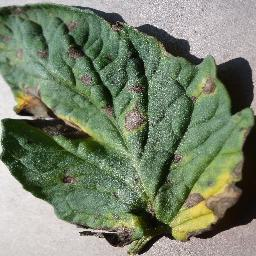
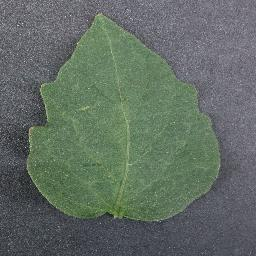
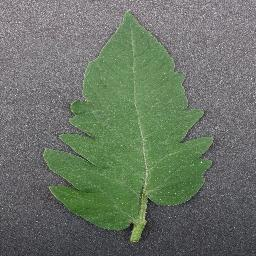
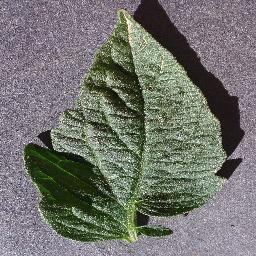
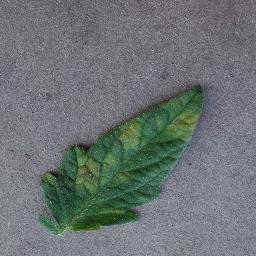
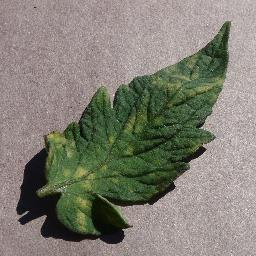
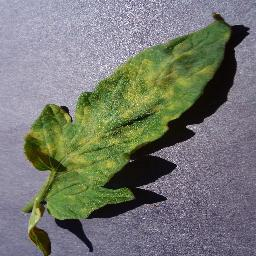
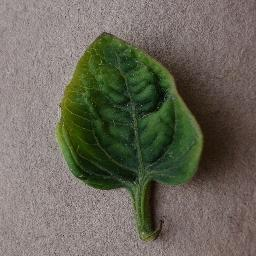
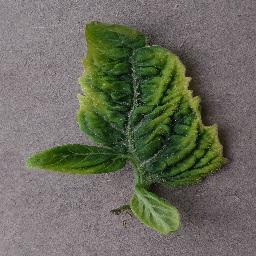
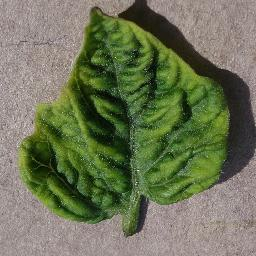

In [14]:

# Create DataFrame with images
image_df = create_image_dataframe(dataset_dir)

# Display the DataFrame as an HTML table
display(HTML(image_df.to_html(escape=False)))



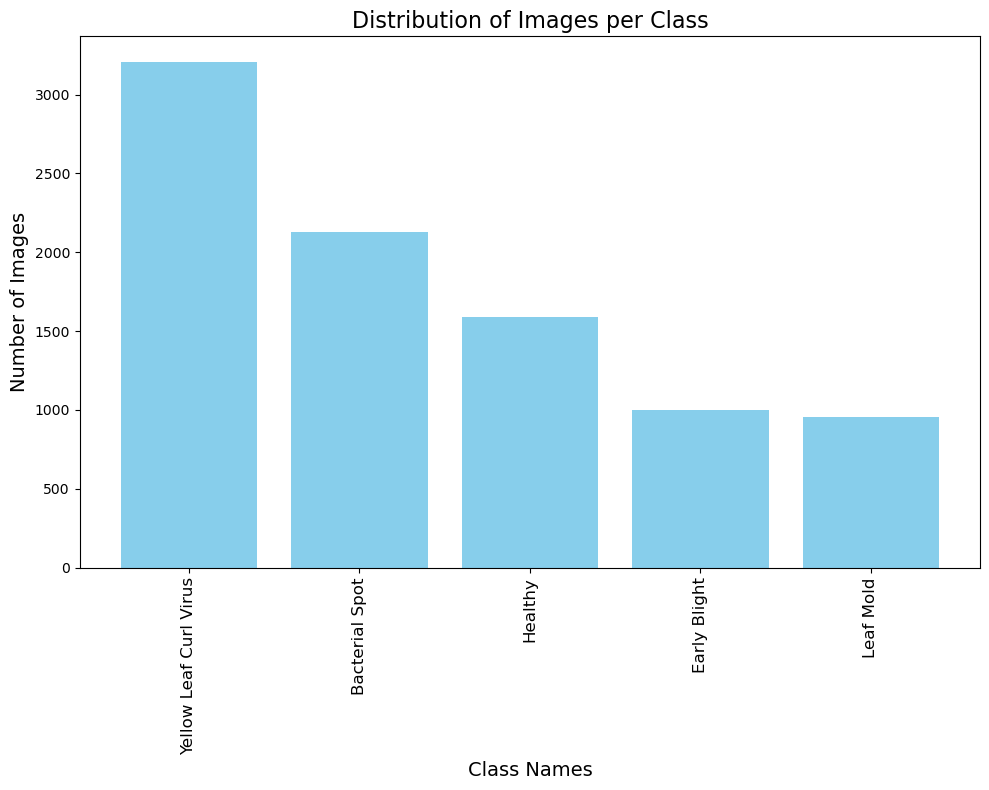

In [17]:

# Plot the distribution of images per class
plot_image_distribution(dataset_dir)

In [28]:
import os
import pandas as pd
from tabulate import tabulate

def count_images_per_class(dataset_dir):
    class_names = []
    total_images = []

    # Iterate through the directories (assumed to be class names) in the dataset directory
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            # Count the number of files (images) in each class directory
            num_images = len([file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))])
            class_names.append(class_name)
            total_images.append(num_images)

    return class_names, total_images

# Get class names and total images
class_names, total_images = count_images_per_class(dataset_dir)

# Splitting images into training and validation (70% training, 30% validation)
training_images = [int(0.7 * count) for count in total_images]
validation_images = [int(0.3 * count) for count in total_images]

# Creating a DataFrame
data = {
    'Class Names': class_names,
    'Total Images': total_images,
    'Training Images': training_images,
    'Validation Images': validation_images
}
df = pd.DataFrame(data)

# Convert DataFrame to a nicely formatted table
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Displaying the table
print(table)


+------------------------+--------------+-----------------+-------------------+
|      Class Names       | Total Images | Training Images | Validation Images |
+------------------------+--------------+-----------------+-------------------+
|     Bacterial Spot     |     2127     |      1488       |        638        |
|      Early Blight      |     1000     |       700       |        300        |
|        Healthy         |     1591     |      1113       |        477        |
|       Leaf Mold        |     952      |       666       |        285        |
| Yellow Leaf Curl Virus |     3209     |      2246       |        962        |
+------------------------+--------------+-----------------+-------------------+


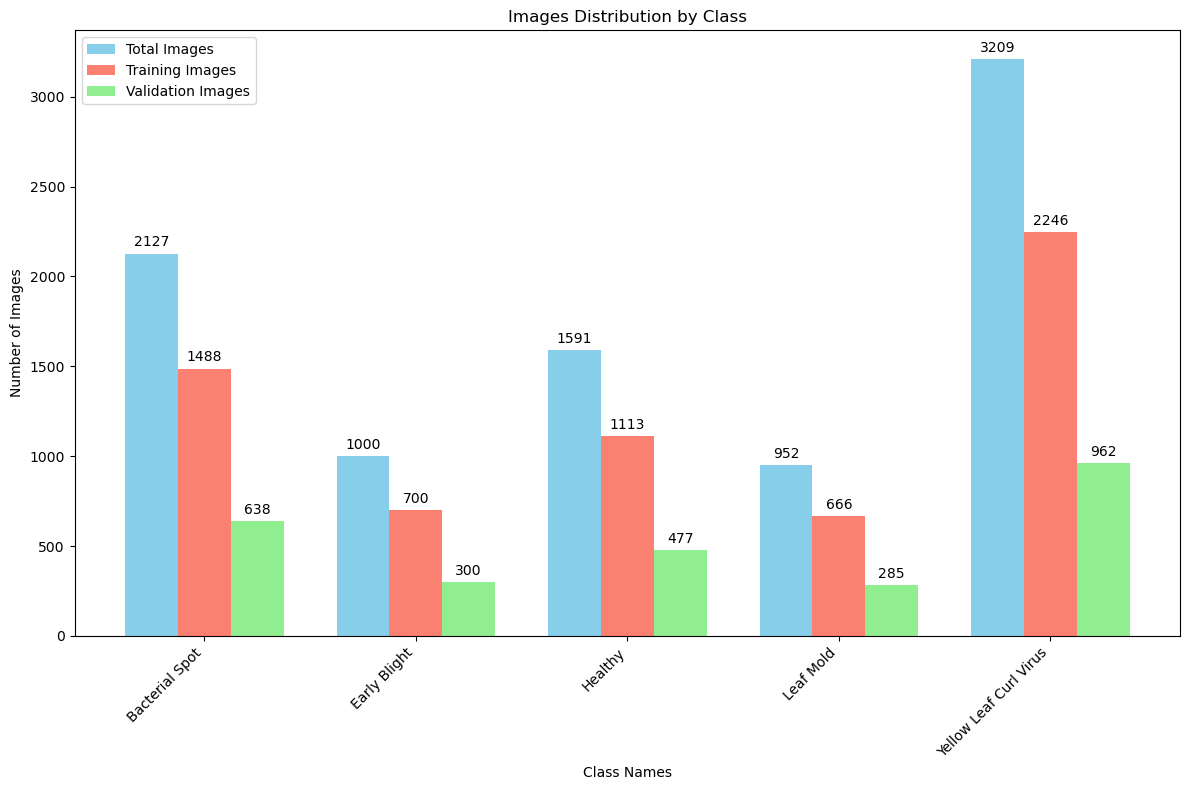

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def count_images_per_class(dataset_dir):
    class_names = []
    total_images = []

    # Iterate through the directories (assumed to be class names) in the dataset directory
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            # Count the number of files (images) in each class directory
            num_images = len([file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))])
            class_names.append(class_name)
            total_images.append(num_images)

    return class_names, total_images
# Get class names and total images
class_names, total_images = count_images_per_class(dataset_dir)

# Splitting images into training and validation (70% training, 30% validation)
training_images = [int(0.7 * count) for count in total_images]
validation_images = [int(0.3 * count) for count in total_images]

# Creating a DataFrame
data = {
    'Class Names': class_names,
    'Total Images': total_images,
    'Training Images': training_images,
    'Validation Images': validation_images
}
df = pd.DataFrame(data)

# Plotting
x = np.arange(len(df['Class Names']))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Creating bars for each type of image count
rects1 = ax.bar(x - width, df['Total Images'], width, label='Total Images', color='skyblue')
rects2 = ax.bar(x, df['Training Images'], width, label='Training Images', color='salmon')
rects3 = ax.bar(x + width, df['Validation Images'], width, label='Validation Images', color='lightgreen')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Class Names')
ax.set_ylabel('Number of Images')
ax.set_title('Images Distribution by Class')
ax.set_xticks(x)
ax.set_xticklabels(df['Class Names'], rotation=45, ha='right')
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Applying the label function
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


In [32]:
import os
import pandas as pd
from tabulate import tabulate
data_dir = r"C:\Users\ACER\Pca_model\Dataset\augment"

def count_images_per_class(data_dir):
    class_names = []
    total_images = []

    # Iterate through the directories (assumed to be class names) in the dataset directory
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            # Count the number of files (images) in each class directory
            num_images = len([file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))])
            class_names.append(class_name)
            total_images.append(num_images)

    return class_names, total_images

# Get class names and total images
class_names, total_images = count_images_per_class(data_dir)

# Splitting images into training and validation (70% training, 30% validation)
training_images = [int(0.7 * count) for count in total_images]
validation_images = [int(0.3 * count) for count in total_images]

# Creating a DataFrame
data = {
    'Class Names': class_names,
    'Total Images': total_images,
    'Training Images': training_images,
    'Validation Images': validation_images
}
df = pd.DataFrame(data)

# Convert DataFrame to a nicely formatted table
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Displaying the table
print(table)


+------------------------+--------------+-----------------+-------------------+
|      Class Names       | Total Images | Training Images | Validation Images |
+------------------------+--------------+-----------------+-------------------+
|     Bacterial Spot     |     3209     |      2246       |        962        |
|      Early Blight      |     3209     |      2246       |        962        |
|        Healthy         |     3209     |      2246       |        962        |
|       Leaf Mold        |     3209     |      2246       |        962        |
| Yellow Leaf Curl Virus |     3208     |      2245       |        962        |
+------------------------+--------------+-----------------+-------------------+


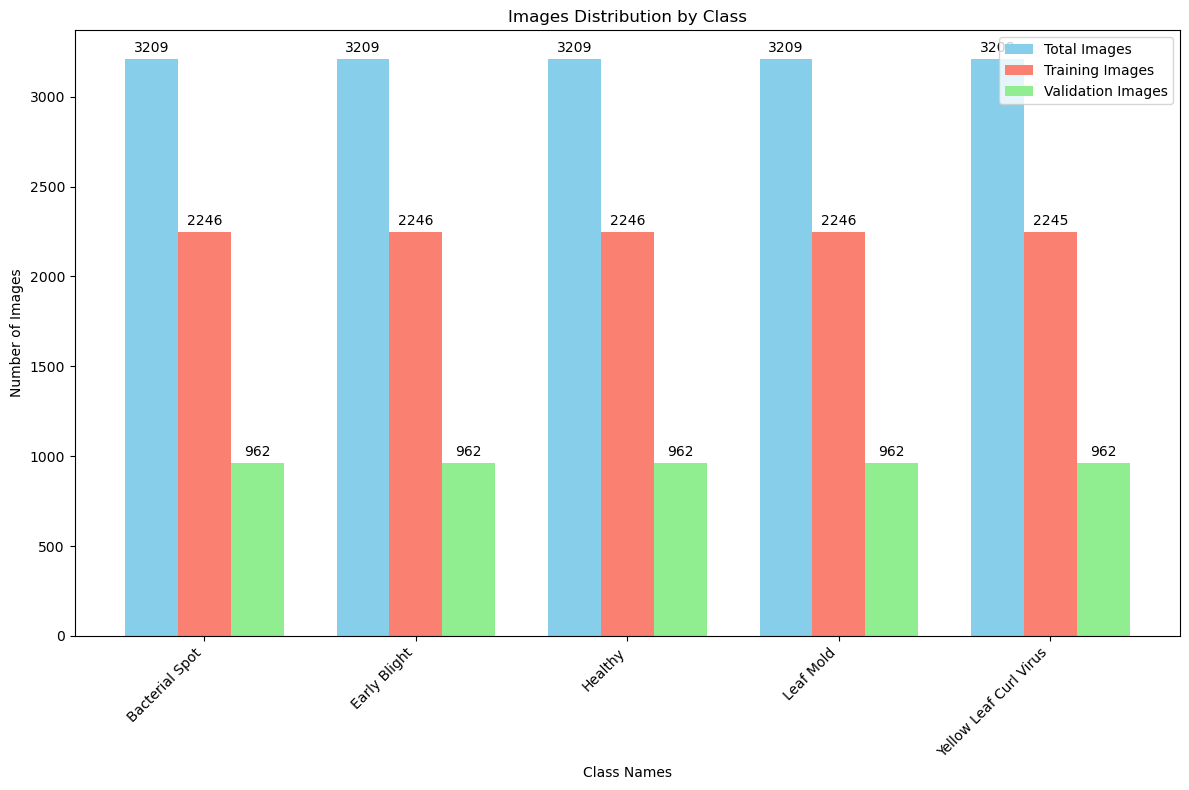

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def count_images_per_class(data_dir):
    class_names = []
    total_images = []

    # Iterate through the directories (assumed to be class names) in the dataset directory
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            # Count the number of files (images) in each class directory
            num_images = len([file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))])
            class_names.append(class_name)
            total_images.append(num_images)

    return class_names, total_images
# Get class names and total images
class_names, total_images = count_images_per_class(data_dir)

# Splitting images into training and validation (70% training, 30% validation)
training_images = [int(0.7 * count) for count in total_images]
validation_images = [int(0.3 * count) for count in total_images]

# Creating a DataFrame
data = {
    'Class Names': class_names,
    'Total Images': total_images,
    'Training Images': training_images,
    'Validation Images': validation_images
}
df = pd.DataFrame(data)

# Plotting
x = np.arange(len(df['Class Names']))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Creating bars for each type of image count
rects1 = ax.bar(x - width, df['Total Images'], width, label='Total Images', color='skyblue')
rects2 = ax.bar(x, df['Training Images'], width, label='Training Images', color='salmon')
rects3 = ax.bar(x + width, df['Validation Images'], width, label='Validation Images', color='lightgreen')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Class Names')
ax.set_ylabel('Number of Images')
ax.set_title('Images Distribution by Class')
ax.set_xticks(x)
ax.set_xticklabels(df['Class Names'], rotation=45, ha='right')
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Applying the label function
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()
